In [9]:
import pandas as pd
import seaborn as sns

In [10]:
Total = pd.read_csv('Acc/찐최종.csv')

<AxesSubplot:ylabel='Count'>

C:\Users\SH\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SH\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SH\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SH\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SH\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SH\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py

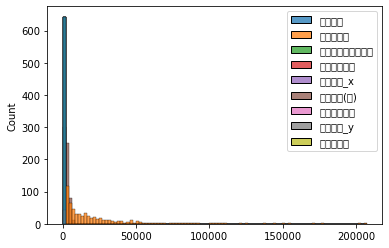

In [11]:
sns.histplot(Total,bins=100, color='k' )

In [14]:
Total['설치유무'] = Total['설치유무'].astype(float)
Total['등록인구수']=Total['등록인구수'].astype(float)
Total['어린이보호구역개수']=Total['어린이보호구역개수'].astype(float)
Total['화재발생횟수']=Total['화재발생횟수'].astype(float)

Total.to_csv('Acc/찐최종.csv',index=0)
Total = pd.read_csv('Acc/찐최종.csv')
Total = Total.rename({'범죄발생비율':'예상범죄횟수'},axis=1)

# Total = Total.drop('인구밀도',axis=1)
Total = Total.drop('범죄총계(구)',axis=1)
Total['전국범죄총계'] = Total['예상범죄횟수'].sum()
Total['예상범죄비율'] = Total['예상범죄횟수'] / Total['전국범죄총계']
Total = Total.drop(['전국범죄총계'],axis=1)
Total

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,인구밀도_x,예상범죄횟수,인구밀도_y,관광지개수,예상범죄비율
0,강원도,강릉시,주문진읍,1.0,17085.0,8.0,0.0,0.01,3.59,0.010943,1.0,0.000258
1,강원도,강릉시,성산면,0.0,3393.0,3.0,0.0,0.00,0.71,0.002173,1.0,0.000051
2,강원도,강릉시,왕산면,0.0,1648.0,2.0,0.0,0.00,0.35,0.001056,0.0,0.000025
3,강원도,강릉시,구정면,0.0,4096.0,5.0,0.0,0.00,0.86,0.002623,0.0,0.000062
4,강원도,강릉시,강동면,1.0,4690.0,3.0,0.0,0.00,0.99,0.003004,0.0,0.000071
...,...,...,...,...,...,...,...,...,...,...,...,...
638,충청북도,진천군,초평면,1.0,3508.0,4.0,0.0,0.04,40.80,0.041631,0.0,0.002933
639,충청북도,진천군,문백면,1.0,4147.0,4.0,0.0,0.05,48.23,0.049214,0.0,0.003467
640,충청북도,진천군,백곡면,1.0,2167.0,2.0,0.0,0.03,25.20,0.025716,0.0,0.001811
641,충청북도,진천군,이월면,0.0,8078.0,6.0,0.0,0.10,93.95,0.095864,0.0,0.006753


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features=[['등록인구수','어린이보호구역개수','화재발생횟수']]
for feature in features:
    Total[feature] = scaler.fit_transform(Total[feature])
Total

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,인구밀도_x,예상범죄횟수,인구밀도_y,관광지개수,예상범죄비율
0,강원도,강릉시,주문진읍,1.0,0.081903,0.1000,0.0,0.01,3.59,0.010943,1.0,0.000258
1,강원도,강릉시,성산면,0.0,0.015829,0.0375,0.0,0.00,0.71,0.002173,1.0,0.000051
2,강원도,강릉시,왕산면,0.0,0.007408,0.0250,0.0,0.00,0.35,0.001056,0.0,0.000025
3,강원도,강릉시,구정면,0.0,0.019221,0.0625,0.0,0.00,0.86,0.002623,0.0,0.000062
4,강원도,강릉시,강동면,1.0,0.022088,0.0375,0.0,0.00,0.99,0.003004,0.0,0.000071
...,...,...,...,...,...,...,...,...,...,...,...,...
638,충청북도,진천군,초평면,1.0,0.016383,0.0500,0.0,0.04,40.80,0.041631,0.0,0.002933
639,충청북도,진천군,문백면,1.0,0.019467,0.0500,0.0,0.05,48.23,0.049214,0.0,0.003467
640,충청북도,진천군,백곡면,1.0,0.009912,0.0250,0.0,0.03,25.20,0.025716,0.0,0.001811
641,충청북도,진천군,이월면,0.0,0.038437,0.0750,0.0,0.10,93.95,0.095864,0.0,0.006753


In [152]:
Total = Total.drop('예상범죄횟수',axis=1)
# Total.to_csv('Dataset/Acc/정규화완료.csv',index=0)
# Total = pd.read_csv('Dataset/Acc/정규화완료.csv')
Total

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,예상범죄비율
0,강원도,강릉시,주문진읍,1.0,0.081903,0.1000,0.0,0.000258
1,강원도,강릉시,성산면,0.0,0.015829,0.0375,0.0,0.000051
2,강원도,강릉시,왕산면,0.0,0.007408,0.0250,0.0,0.000025
3,강원도,강릉시,구정면,0.0,0.019221,0.0625,0.0,0.000062
4,강원도,강릉시,강동면,1.0,0.022088,0.0375,0.0,0.000071
...,...,...,...,...,...,...,...,...
638,충청북도,진천군,초평면,1.0,0.016383,0.0500,0.0,0.002933
639,충청북도,진천군,문백면,1.0,0.019467,0.0500,0.0,0.003467
640,충청북도,진천군,백곡면,1.0,0.009912,0.0250,0.0,0.001811
641,충청북도,진천군,이월면,0.0,0.038437,0.0750,0.0,0.006753


In [159]:
Test5 = Total[['설치유무','등록인구수','어린이보호구역개수','화재발생횟수','예상범죄비율']]
# Test4.to_csv('Dataset/Acc/Test4.csv',index=0)

In [160]:
# 모델 평가 준비 작업
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = Test5['설치유무'] # 종속변수
X_t_df = Test5.drop('설치유무', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 5)

print(X_train.shape)
print(X_test.shape)

(514, 4)
(129, 4)


In [161]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.8837209302325582, lr 정확도:0.8604651162790697
